# Rotavibrational Analysis of the Infrared Spectrum of HCl/DCl
## Brandon Cohen
### May 1, 2023

## Purpose

Given a reference spectrum of a mixture of HCl and DCl, rotavibrational analysis of the peaks, identification of the isotopic contributions of four different species (<sup>1</sup>H<sup>35</sup>Cl, <sup>1</sup>H<sup>37</sup>Cl, <sup>2</sup>H<sup>35</sup>Cl, and <sup>2</sup>H<sup>37</sup>Cl) and correlate the measured constants with calculated constants obtained from _ab initio_ calculations run in Gaussian16 will be performed. 

# Introduction

Infrared spectroscopy (IR) is an incredible analytical instrument that has capabilities that other instruments do not have. IR uses low energy radiation to excite the bonds of molecules where absorption occurs at the vibrational frequency of the individual bond. Using this fact, diatomic HCl and DCl of isotope $^{35}Cl$ and  $^{37}Cl$ were used as a simple model of one vibrational mode to observe the power of IR's ability to determine vibrational frequencies. In this paper, an infrared spectrum of HCl and DCl was measured to determine rotational fine structure, moment of inertia of the molecule, internuclear separation, isotope effects, and bond strengths through pure vibrational frequency. A computational approach was also used with Gaussian finding the bond length energy and rotational anharmonic energy as well as equilibrium bond length and energy. It is well known that energy is quantized. Taking this fact into account, many equations used in this paper were taken from two theories of diatomic molecules: rigid rotor model approximation and the harmonic oscillator model. 

# Setup

## Library import

In [4]:
# Directory searching
import glob

# Data manipulation
import numpy as np
import scipy as sp
import pandas as pd

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Computational chemistry
# import json
import cclib
# import openchemistry as oc

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Used to print a statment in the middle
from IPython.core.display import display, HTML
def centered(content):
    display(HTML(f"<div style='text-align:center'>{content}</div>"))


# Data import


In [5]:
# These two files were taken as one continuous collection using a Nicolet iS5
# FTIR spectrometer. Sample details can be found in the instruction manual.
hcl_spectrum = pd.read_csv('raw_spectra/HCl_spectrum.csv', 
                           comment='#', # Lines beginning with '#' are skipped
                           skip_blank_lines=True, # Blank lines are skipped
                           skipinitialspace=True, # Skip spaces after delimiter
                           index_col=['Wavenumber']) # Set the index column
dcl_spectrum = pd.read_csv('raw_spectra/DCl_spectrum.csv', 
                           comment='#', 
                           skip_blank_lines=True, 
                           skipinitialspace=True,
                           index_col=['Wavenumber'])

print('Table 1. IR Absorbance of HCl')
hcl_spectrum.head()

Table 1. IR Absorbance of HCl


Absorbance
Wavenumber            
2650.00         0.0244
2650.12         0.0251
2650.25         0.0252
2650.38         0.0247
2650.50         0.0239

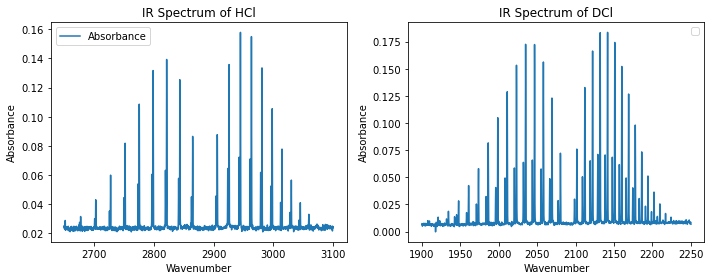

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
hcl_spectrum.plot(ax=ax1)
dcl_spectrum.plot(ax=ax2)
ax1.set_title('IR Spectrum of HCl')
ax1.set_ylabel('Absorbance')
ax2.set_title('IR Spectrum of DCl')
ax2.set_ylabel('Absorbance')
ax2.legend('')
plt.tight_layout()
centered('Figure 1. IR Spectra')

I began by running Gaussian scans on the bond length using the template file `gaussian_calcs/bond_scans/hcl_bond-template.com` using different methods:

|       Method Type         | Gaussian Keyword |
| :-----------------------  | :--------------  |
| Unrestricted Hartree-Fock |     `UHF`        |
|           DFT             |   `PBE1PBE`      |
|     Coupled Cluster       |   `CCSD(T)`      |

We want to make a dictionary in which to store all of our constants that are calculated later in the lab. For now, we'll just create the dictionary with a header row. Later, as we calculate the constants for each molecule, we will add in keys (rows) with a corresponding list of constants.

In [7]:
# Create a dictionary with the molecule as the key and the variables as a list of values
hcl_con_dict = {'Constants': ['nu_0 (cm-1)', 'B_e (cm-1)', 'D_e (cm-1)', 'nu_e (cm-1)', 'k', ...]}

In [9]:
# Import bond scan logs
# Create an empty dictionary of bond scan logs
hcl_pes = dict()

# If your names are reasonable, you should be able to capture your method 
# name with the `*` character below. Example would be 
# `scan-UHF.log`, `scan-PBE.log`, `scan-CCSDT.log`
for name in glob.glob('gaussian_calcs/bond_scans/*.log'):
    # Create a reference name based on your filename
    logname = name.split(sep='.')[0]
    hcl_pes[logname] = cclib.io.ccread(name)
hcl_pes

{'gaussian_calcs/bond_scans/PBE1PBE': <cclib.parser.data.ccData_optdone_bool at 0x7f42a0b89190>,
 'gaussian_calcs/bond_scans/UHF': <cclib.parser.data.ccData_optdone_bool at 0x7f42a0b89880>,
 'gaussian_calcs/bond_scans/CCSD': <cclib.parser.data.ccData_optdone_bool at 0x7f42a0b84c70>}

In the next cell, I searched my log files for the section labeled ‚ÄúVibrational Energies at Anharmonic Level‚Äù. In there, I pulled the relevant anharmonic energies and inserted them into the `np.array`s below. The harmonic vibrational energy is already set. I set a value for the rotational energy and the ground state energy.

In [10]:
# Import data from the vibrotational calculations. 
# May need to keep in cclib format

## Manually copy values from the Anharmonic Energy section of the log files.  

# Create dictionary of calculation logs
hcl_logs = dict()
# for name in glob.glob('gaussian_calcs/vibrot_calcs/[hd]3[57]cl.log'):
for name in glob.glob('gaussian_calcs/vibrot_calcs/*.log'):
    logname = name.split(sep='/')[-1].split(sep='.')[0]
    hcl_logs[logname] = cclib.io.ccread(name)

# Fill in your values from your log files below
hcl_logs['h35cl'].vibanharms = np.array([2955.243, 5810.600])
hcl_logs['h37cl'].vibanharms = np.array([2953.081, 5806.429])
hcl_logs['d35cl'].vibanharms = np.array([2139.806, 4228.272])
hcl_logs['d37cl'].vibanharms = np.array([2139.806, 4228.272])

# Add values for rotational constants and ground state energy below:
hcl_logs['h35cl'].rotation = 10.651209
hcl_logs['h37cl'].rotation = 10.635090
hcl_logs['d35cl'].rotation = 5.478772
hcl_logs['d37cl'].rotation = 5.462652


# Check to make sure all imports were successful. 
# You should see a summary for each molecule. 
for mol, log in hcl_logs.items():
    print(mol.upper())
    for key, value in log.metadata.items():
        print(f'{key:18}: {value}')

H37CL
package           : Gaussian
methods           : ['HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'MP2', 'HF', 'MP2', 'MP2', 'HF', 'MP2', 'MP2']
success           : True
legacy_package_version: 16revisionB.01
package_version   : 2016+B.01
platform          : ES64L
basis_set         : def2QZVPP
cpu_time          : [datetime.timedelta(seconds=66, microseconds=100000), datetime.timedelta(seconds=414, microseconds=300000)]
wall_time         : [datetime.timedelta(seconds=46, microseconds=600000), datetime.timedelta(seconds=207, microseconds=400000)]
H35CL
package           : Gaussian
methods           : ['HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'MP2', 'HF', 'MP2', 'MP2', 'HF', 'MP2', 'MP2']
success           : True
legacy_package_version: 16revisionB.01
package_version   : 2016+B.01
platform          : ES64L
basis_set         : def2QZVPP
cpu_time          : [datetime.timedelta(seconds=65), datetime.timedelta(seconds=406, microseconds=500000)]
w

/opt/tljh/user/envs/pchem2_lab/lib/python3.8/site-packages/cclib/parser/utils.py:182: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r, _ = scipy.spatial.transform.Rotation.align_vectors(b_, a_)


## Bond length analysis

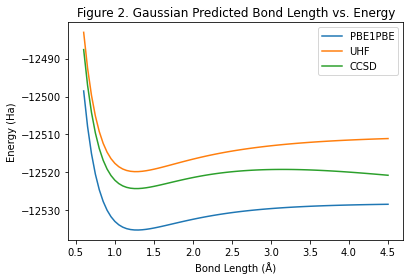

In [11]:
methods = []

for method, data in hcl_pes.items():
    methods.append(method)
    plt.plot(data.scanparm[0], data.scanenergies)
plt.legend(methods)
plt.xlabel('Bond Length (√Ö)')
plt.ylabel('Energy (Ha)')
plt.title('Figure 2. Gaussian Predicted Bond Length vs. Energy')
plt.legend(['PBE1PBE', 'UHF', 'CCSD']);
plt.show()
#Shows the idea of anharmoncic plot which is in Figure 1 of the lab report

In [12]:
# Calculate equilibrium bond length and display energy from calculations
from scipy.spatial import distance

### Uses the rotational calucaltions

for name, mol in hcl_logs.items():
    mol.eqbond = distance.euclidean(mol.atomcoords[-1][0], mol.atomcoords[-1][1])
    print(f'The equilibrium bond length in {name.upper()} is {mol.eqbond} √Ö.')
    print(f'The minimum energy in {name.upper()} is {mol.freeenergy} Ha.')

The equilibrium bond length in H37CL is 1.271089 √Ö.
The minimum energy in H37CL is -460.346956 Ha.
The equilibrium bond length in H35CL is 1.271089 √Ö.
The minimum energy in H35CL is -460.346873 Ha.
The equilibrium bond length in D37CL is 1.271089 √Ö.
The minimum energy in D37CL is -460.349593 Ha.
The equilibrium bond length in D35CL is 1.271089 √Ö.
The minimum energy in D35CL is -460.349508 Ha.


## Analysis of <sup>1</sup>HCl Spectra

This next cell is where some of the routines in the `scipy` package can really shine. I could open these spectra in Excel and try to pick out the peak maxima by hand, hoping that I really grabbed the peak and didn't miss a step, but this is a problem ripe for automation. The `scipy.signal` library contains the [`find_peaks`][sp-find_peaks] function which allows us to automatically grab peaks. The automation can be trained on a number of parameters. I used the `prominence` and `height` parameters to exclude "peaks" in the baseline and prevent grabbing peaks that are too close to each other (_i.e.,_ if a peak has a slight shoulder, both points might be chosen). 

34


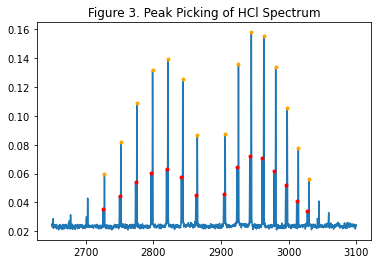

In [13]:
# Extract peak locations from HCl spectra
from scipy.signal import find_peaks, peak_prominences
peaks_hcl, _ = find_peaks(hcl_spectrum['Absorbance'],
                     prominence= 0.01, # Start with .01, adjust from there
                     height= 0.017)  # Start just above the baseline of your spectrum
print(len(peaks_hcl)) # Tells us how many total peaks were found


# I plotted the spectrum along with the peaks we found. Note the steps
# in the peaks list. I know that there are two isotopes and that they 
# should be every other peak, so we step by 2. List slicing (or stepping)
# is done with [start:stop:step].  
plt.plot(hcl_spectrum.index, hcl_spectrum['Absorbance'])
plt.plot(hcl_spectrum.iloc[peaks_hcl[2:-2:2]], # Select the even peaks
         marker='.', 
         color='red',
         linewidth=0)
plt.plot(hcl_spectrum.iloc[peaks_hcl[3:-1:2]], # Select the odd peaks
         marker='.', 
         color='orange',
         linewidth=0)
plt.title('Figure 3. Peak Picking of HCl Spectrum')
plt.show()

After selecting the peaks, I assigned the peak wavenumbers to a new list and matched them to the _m_ values for analysis. Note that there is no peak for $ m = 0 $.

In [83]:
# Assign peak wavelengths to dataframe
m_values = np.arange(-7,9)
m_values = m_values[m_values != 0]
hcl_data = {'m': m_values,
            'H35Cl': hcl_spectrum.iloc[peaks_hcl[3:-1:2]].index.values,
            'H37Cl': hcl_spectrum.iloc[peaks_hcl[2:-2:2]].index.values}
print(m_values)
# Create a dataframe from our assigned values
hcl_peak_data = pd.DataFrame(data=hcl_data)

print('Table 2. HCl m Values Associated with Peak Wavelengths')
hcl_peak_data.head()

[-7 -6 -5 -4 -3 -2 -1  1  2  3  4  5  6  7  8]
Table 2. HCl m Values Associated with Peak Wavelengths


m    H35Cl    H37Cl
0 -7  2727.88  2726.00
1 -6  2752.12  2750.12
2 -5  2775.75  2773.88
3 -4  2799.00  2797.00
4 -3  2821.62  2819.62

In [84]:
# Print difference between peaks scaled by difference in m values
print('Mean values:\n',hcl_peak_data[['H35Cl','H37Cl']].diff().div(hcl_peak_data['m'].diff(), axis=0).mean())
print('Table 3. HCl Subtracted Peak Energies')
hcl_peak_data[['H35Cl','H37Cl']].diff().div(hcl_peak_data.m.diff(), axis=0)

Mean values:
 H35Cl    20.119643
H37Cl    20.098571
dtype: float64
Table 3. HCl Subtracted Peak Energies


H35Cl  H37Cl
0      NaN    NaN
1   24.240  24.12
2   23.630  23.76
3   23.250  23.12
4   22.620  22.62
5   22.000  22.00
6   21.500  21.50
7   20.565  20.50
8   19.750  19.63
9   19.000  19.00
10  18.380  18.37
11  17.620  17.63
12  17.120  17.13
13  16.380  16.24
14  15.620  15.76

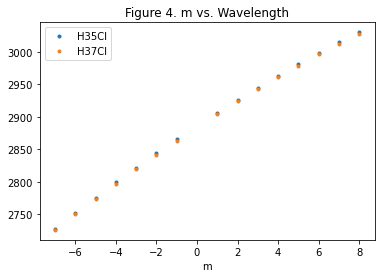

In [16]:
# Plot 'm' vs peak location
hcl_peak_data.plot(x='m', y=['H35Cl','H37Cl'], marker='.', linewidth=0)
plt.title('Figure 4. m vs. Wavelength')
plt.show()

At this point, I used the `curve_fit` routine from `scipy.optimize`. The statistics for the curve fit are given as a [covariance matrix][cov-mat]. The diagonal elements are the variance of the individual elements (fit parameters, the polynomial coefficients in this case). To get out the standard errors, I took the square root of the diagonal elements of that matrix (line 11). 

[cov-mat]: https://en.wikipedia.org/wiki/Covariance_matrix

[2.88600857e+03 1.05954599e+01 3.02726024e-01 5.83241007e-04] 
 [1.62405661e-02 2.61468056e-03 5.84373875e-04 3.28950695e-05]


Text(0, 0.5, 'Wavenumber')

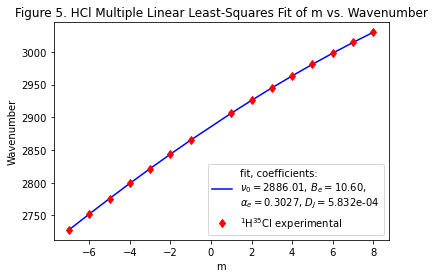

In [17]:
from scipy.optimize import curve_fit

# Create model function for \nu(m). Can be kept for later fits
def nu(m, nu0, B_e, A_e, D_J):
    return nu0 + ((2 * B_e - 2 * A_e) * m) - (A_e * m ** 2) - (4* D_J * m ** 3)

# Fit the H35Cl data, store the fit coefficients and covariance matrix
h35cl_coeff, h35cl_cov = curve_fit(nu, hcl_peak_data['m'], hcl_peak_data['H35Cl'])

# Diagonal elements are the variance of the fit parameters, \sigma^2
h35cl_fit_err = np.sqrt(np.diag(h35cl_cov)) 
print(h35cl_coeff,'\n', h35cl_fit_err)

# Plot our resultant fit agains the original data as a check
plt.plot(hcl_peak_data['m'], nu(hcl_peak_data['m'], *h35cl_coeff), 'b-',
         hcl_peak_data['m'], hcl_peak_data['H35Cl'], 'rd')

# Provide a legend that states the fit parameters. 
# LaTeX elements can be included by wrapping them in $‚Ä¶$
plt.legend(['fit, coefficients:\n' + 
            f'$\\nu_0=${h35cl_coeff[0]:1.2f}, $B_e=${h35cl_coeff[1]:1.2f},\n' + 
            f'$\\alpha_e=${h35cl_coeff[2]:1.4}, $D_J=${h35cl_coeff[3]:1.3e}', 
            '$^1$H$^{35}$Cl experimental'],loc='lower right')
plt.title('Figure 5. HCl Multiple Linear Least-Squares Fit of m vs. Wavenumber')
plt.xlabel('m')
plt.ylabel('Wavenumber')

[2.88390433e+03 1.05732740e+01 3.02785498e-01 4.90491555e-04] 
 [1.77413650e-02 2.85633745e-03 6.38371484e-04 3.59346187e-05]


Text(0, 0.5, 'Wavenumber')

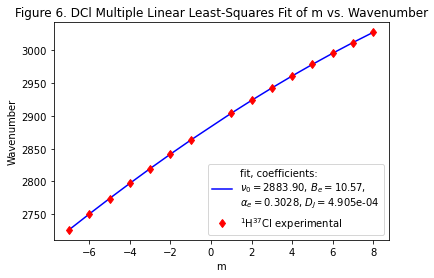

In [18]:
# Fit the H35Cl data, store the fit coefficients and covariance matrix
h37cl_coeff, h37cl_cov = curve_fit(nu, hcl_peak_data['m'], hcl_peak_data['H37Cl'])

# Diagonal elements are the variance of the fit parameters, \sigma^2
h37cl_fit_err = np.sqrt(np.diag(h37cl_cov)) 
print(h37cl_coeff,'\n', h37cl_fit_err)

# Plot our resultant fit agains the original data as a check
plt.plot(hcl_peak_data['m'], nu(hcl_peak_data['m'], *h37cl_coeff), 'b-',
         hcl_peak_data['m'], hcl_peak_data['H37Cl'], 'rd')

# Provide a legend that states the fit parameters. 
# LaTeX elements can be included by wrapping them in $‚Ä¶$
plt.legend(['fit, coefficients:\n' + 
            f'$\\nu_0=${h37cl_coeff[0]:1.2f}, $B_e=${h37cl_coeff[1]:1.2f},\n' + 
            f'$\\alpha_e=${h37cl_coeff[2]:1.4}, $D_J=${h37cl_coeff[3]:1.3e}', 
            '$^1$H$^{37}$Cl experimental'],loc='lower right')

plt.title('Figure 6. DCl Multiple Linear Least-Squares Fit of m vs. Wavenumber')
plt.xlabel('m')
plt.ylabel('Wavenumber')

## Analysis of <sup>2</sup>HCl Spectra

I repeated the previous steps for the deuterium chloride spectrum.

49


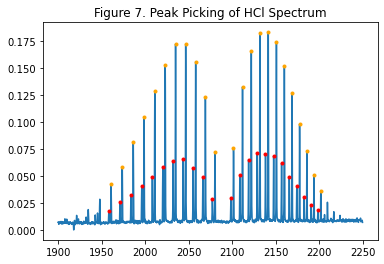

In [19]:
peaks_dcl, _ = find_peaks(dcl_spectrum['Absorbance'],
                     prominence= 0.01, # Start with .01, adjust from there
                     height= 0.017)  # Start just above the baseline of your spectrum
print(len(peaks_dcl)) # Tells us how many total peaks were found


plt.plot(dcl_spectrum.index, dcl_spectrum['Absorbance'])
plt.plot(dcl_spectrum.iloc[peaks_dcl[2:-1:2]], # Select the even peaks
         marker='.', 
         color='red',
         linewidth=0)
plt.plot(dcl_spectrum.iloc[peaks_dcl[3:-1:2]], # Select the odd peaks
         marker='.', 
         color='orange',
         linewidth=0)
plt.title('Figure 7. Peak Picking of HCl Spectrum')
plt.show()

In [82]:
# Assign peak wavelengths to dataframe
m_values = np.arange(-11,13)
m_values = m_values[m_values != 0]
dcl_data = {'m': m_values,
            'D35Cl': dcl_spectrum.iloc[peaks_dcl[3:-1:2]].index.values,
            'D37Cl': dcl_spectrum.iloc[peaks_dcl[2:-1:2]].index.values}
print(m_values)
# Create a dataframe from our assigned values
dcl_peak_data = pd.DataFrame(data=dcl_data)

print('Table 4. DCl m Values Associated with Peak Wavelengths')
dcl_peak_data.head()

[-11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   1   2   3   4   5   6   7
   8   9  10  11  12]
Table 4. DCl m Values Associated with Peak Wavelengths


m    D35Cl    D37Cl
0 -11  1960.88  1958.25
1 -10  1973.75  1971.00
2  -9  1986.38  1983.62
3  -8  1998.75  1996.12
4  -7  2011.12  2008.25

In [85]:
# Print difference between peaks scaled by difference in m values
print('Mean values:\n',dcl_peak_data[['D35Cl','D37Cl']].diff().div(dcl_peak_data['m'].diff(), axis=0).mean())
print('Table 5. Subtracted Peak Energies')
dcl_peak_data[['D35Cl','D37Cl']].diff().div(dcl_peak_data.m.diff(), axis=0)

Mean values:
 D35Cl    10.474318
D37Cl    10.449091
dtype: float64
Table 5. Subtracted Peak Energies


D35Cl  D37Cl
0      NaN    NaN
1   12.870  12.75
2   12.630  12.62
3   12.370  12.50
4   12.370  12.13
5   12.000  12.13
6   11.880  11.74
7   11.620  11.63
8   11.500  11.37
9   11.130  11.26
10  11.000  11.00
11  10.685  10.62
12  10.380  10.26
13  10.120  10.12
14   9.880   9.88
15   9.620   9.50
16   9.380   9.37
17   9.120   9.13
18   8.880   8.87
19   8.620   8.63
20   8.380   8.37
21   8.120   8.13
22   7.880   7.87

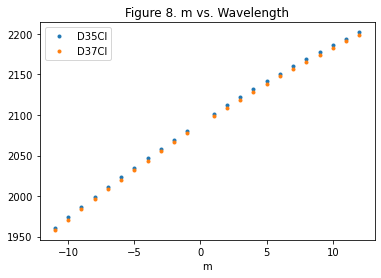

In [22]:
# Plot 'm' vs peak location
dcl_peak_data.plot(x='m', y=['D35Cl','D37Cl'], marker='.', linewidth=0)
plt.title('Figure 8. m vs. Wavelength')
plt.show()

[2.09109271e+03 5.45099826e+00 1.12210026e-01 1.57477893e-04] 
 [1.08821041e-02 1.22516142e-03 1.70139441e-04 6.65171477e-06]


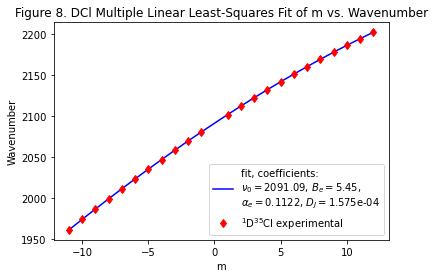

In [23]:
# Fit the H35Cl data, store the fit coefficients and covariance matrix
d35cl_coeff, d35cl_cov = curve_fit(nu, dcl_peak_data['m'], dcl_peak_data['D35Cl'])

# Diagonal elements are the variance of the fit parameters, \sigma^2
d35cl_fit_err = np.sqrt(np.diag(d35cl_cov)) 
print(d35cl_coeff,'\n', d35cl_fit_err)

# Plot our resultant fit agains the original data as a check
plt.plot(dcl_peak_data['m'], nu(dcl_peak_data['m'], *d35cl_coeff), 'b-',
         dcl_peak_data['m'], dcl_peak_data['D35Cl'], 'rd')

# Provide a legend that states the fit parameters. 
# LaTeX elements can be included by wrapping them in $‚Ä¶$
plt.legend(['fit, coefficients:\n' + 
            f'$\\nu_0=${d35cl_coeff[0]:1.2f}, $B_e=${d35cl_coeff[1]:1.2f},\n' + 
            f'$\\alpha_e=${d35cl_coeff[2]:1.4}, $D_J=${d35cl_coeff[3]:1.3e}', 
            '$^1$D$^{35}$Cl experimental'],loc='lower right')

plt.title('Figure 8. DCl Multiple Linear Least-Squares Fit of m vs. Wavenumber')
plt.xlabel('m')
plt.ylabel('Wavenumber')
plt.show()

[2.08807939e+03 5.43163950e+00 1.11864346e-01 1.32422221e-04] 
 [1.18753489e-02 1.33695189e-03 1.85669522e-04 7.25867144e-06]


Text(0, 0.5, 'Wavenumber')

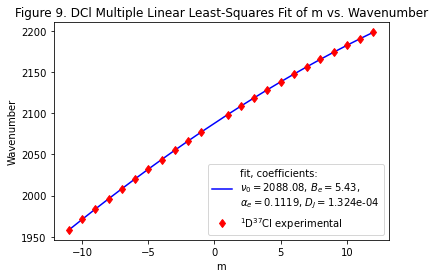

In [24]:
# Fit the H35Cl data, store the fit coefficients and covariance matrix
d37cl_coeff, d37cl_cov = curve_fit(nu, dcl_peak_data['m'], dcl_peak_data['D37Cl'])

# Diagonal elements are the variance of the fit parameters, \sigma^2
d37cl_fit_err = np.sqrt(np.diag(d37cl_cov)) 
print(d37cl_coeff,'\n', d37cl_fit_err)

# Plot our resultant fit agains the original data as a check
plt.plot(dcl_peak_data['m'], nu(dcl_peak_data['m'], *d37cl_coeff), 'b-',
         dcl_peak_data['m'], dcl_peak_data['D37Cl'], 'rd')

# Provide a legend that states the fit parameters. 
# LaTeX elements can be included by wrapping them in $‚Ä¶$
plt.legend(['fit, coefficients:\n' + 
            f'$\\nu_0=${d37cl_coeff[0]:1.2f}, $B_e=${d37cl_coeff[1]:1.2f},\n' + 
            f'$\\alpha_e=${d37cl_coeff[2]:1.4}, $D_J=${d37cl_coeff[3]:1.3e}', 
            '$^1$D$^{37}$Cl experimental'],loc='lower right')

plt.title('Figure 9. DCl Multiple Linear Least-Squares Fit of m vs. Wavenumber')
plt.xlabel('m')
plt.ylabel('Wavenumber')

## Calculation of molecular constants

In [89]:
#hcl_con_dict['Constants'][0] = [h35cl_coeff[0], h37cl_coeff[0], d35cl_coeff[0], d37cl_coeff[0]]
#hcl_con_dict = {'Constants': ['nu_0', 'B_e', 'A_e', 'D_e', 'nu_e', 'k', ...]}
cal_vars_dict = {'': ['H35Cl', 'H37Cl', 'D35Cl', 'D37Cl'], 'nu_e (cm-1)' : [], 'nu_0 (cm-1)': [], 'B_e (cm-1)' : [], 'alpha_e (cm-1)' : [], 'D_j (cm-1)' : [], 'nu_e (cm-1)' : [], 'k' : []}
cal_vars_dict['nu_0 (cm-1)'] = [round(h35cl_coeff[0], 3), round(h37cl_coeff[0], 3), round(d35cl_coeff[0], 3), round(d37cl_coeff[0], 3)]
cal_vars_dict['B_e (cm-1)'] = [round(h35cl_coeff[1], 3), round(h37cl_coeff[1], 3), round(d35cl_coeff[1], 3), round(d37cl_coeff[1], 3)]
cal_vars_dict['alpha_e (cm-1)'] = [round(h35cl_coeff[2], 3), round(h37cl_coeff[2], 3), round(d35cl_coeff[2], 3), round(d37cl_coeff[2], 3)]
cal_vars_dict['D_j (cm-1)'] = [round(h35cl_coeff[3], 6), round(h37cl_coeff[3], 6), round(d35cl_coeff[3], 6), round(d37cl_coeff[3], 6)]
cal_vars_dict

{'': ['H35Cl', 'H37Cl', 'D35Cl', 'D37Cl'],
 'nu_e (cm-1)': [],
 'nu_0 (cm-1)': [2886.009, 2883.904, 2091.093, 2088.079],
 'B_e (cm-1)': [10.595, 10.573, 5.451, 5.432],
 'alpha_e (cm-1)': [0.303, 0.303, 0.112, 0.112],
 'D_j (cm-1)': [0.000583, 0.00049, 0.000157, 0.000132],
 'k': []}

In [90]:
# Calculate values for \nu_e, \nu_e\chi_e, k (force constant)

# USE EQUATION 18 AND EQUATION 8 TO FIND NU_E AND NU_E*CHI_E WITH TWO EQUATIONS
#H35CL WILL BE ALL VALUES WITHOUT A STAR SO NU_E IN EQ.9 WILL BE H35CL value
#D35CL WILL BE ALL VALUES WITH A STAR
### THIS WILL GET ME NU_E*CHI_E WHICH IS CONSIDERED ONE VARIABLE
#REPAT PROCESS FOUR TIMES

##DO NOT HAVE TO CALCUATE D_e and D_0
mass_h35cl = 35+1
mass_h37cl = 37+1
mass_d35cl = 35+2
mass_d37cl = 37+2

def reduced_mass(mass1, mass2):
    numerator = mass1*mass2
    denominator = mass1+mass2
    return numerator/denominator

def nu_e_CHI_e(nu_0, reduced_mass1, reduced_mass2):
    numerator = nu_0 * (1 - np.sqrt(reduced_mass1/reduced_mass2))
    denominator = 2 * ( np.sqrt(reduced_mass1/reduced_mass2) - (reduced_mass1/reduced_mass2) )
    return round(numerator/denominator, 3)

#Combining Eq. 18 and Eq. 9
h35cl_nu_e_times_CHI_e = nu_e_CHI_e(cal_vars_dict['nu_0 (cm-1)'][0], reduced_mass(35, 1), reduced_mass(37, 1))
h37cl_nu_e_times_CHI_e = nu_e_CHI_e(cal_vars_dict['nu_0 (cm-1)'][0], reduced_mass(37, 1), reduced_mass(35, 1))
d35cl_nu_e_times_CHI_e = nu_e_CHI_e(cal_vars_dict['nu_0 (cm-1)'][0], reduced_mass(35, 2), reduced_mass(37, 1))
d37cl_nu_e_times_CHI_e = nu_e_CHI_e(cal_vars_dict['nu_0 (cm-1)'][0], reduced_mass(37, 2), reduced_mass(37, 1))

cal_vars_dict['nu_e*CHI_e'] = [h35cl_nu_e_times_CHI_e, h37cl_nu_e_times_CHI_e, d35cl_nu_e_times_CHI_e, d37cl_nu_e_times_CHI_e]

h35cl_nu_e = (cal_vars_dict['nu_0 (cm-1)'][0] + 2*h35cl_nu_e_times_CHI_e)/2
h37cl_nu_e = (cal_vars_dict['nu_0 (cm-1)'][0] + 2*h37cl_nu_e_times_CHI_e)/2
d35cl_nu_e = (cal_vars_dict['nu_0 (cm-1)'][0] + 2*d35cl_nu_e_times_CHI_e)/2
d37cl_nu_e = (cal_vars_dict['nu_0 (cm-1)'][0] + 2*d37cl_nu_e_times_CHI_e)/2

cal_vars_dict['nu_e (cm-1)'] = [round(h35cl_nu_e, 3), round(h37cl_nu_e, 3), round(d35cl_nu_e, 3), round(d37cl_nu_e, 3)]

In [91]:
h35cl_k = ( cal_vars_dict['nu_e (cm-1)'][0]*(2*np.pi*sp.constants.speed_of_light) )**2 *reduced_mass(35, 1) 
h37cl_k = ( cal_vars_dict['nu_e (cm-1)'][1]*(2*np.pi*sp.constants.speed_of_light) )**2 *reduced_mass(37, 1) 
d35cl_k = ( cal_vars_dict['nu_e (cm-1)'][2]*(2*np.pi*sp.constants.speed_of_light) )**2 *reduced_mass(35, 2) 
d37cl_k = ( cal_vars_dict['nu_e (cm-1)'][3]*(2*np.pi*sp.constants.speed_of_light) )**2 *reduced_mass(37, 2) 
cal_vars_dict['k'] = [round(h35cl_k, 28), round(h37cl_k, 3), round(d35cl_k, 3), round(d37cl_k, 3)] 


In [92]:
#EQ FROM QUESTIONS & FURTHER THOUGHTS/DATA ANALYSIS QUESTION 2

def Bv(B_e, alpha_e, quantum_nums):
    temp_Bv = []
    for v in range(quantum_nums):
        result = B_e - alpha_e*(v + 1/2)
        temp_Bv.append(round(result, 3))
    return temp_Bv
        
h35cl_Bv_values = Bv(cal_vars_dict['B_e (cm-1)'][0], cal_vars_dict['alpha_e (cm-1)'][0], 3)
h37cl_Bv_values = Bv(cal_vars_dict['B_e (cm-1)'][1], cal_vars_dict['alpha_e (cm-1)'][1], 3)
d35cl_Bv_values = Bv(cal_vars_dict['B_e (cm-1)'][2], cal_vars_dict['alpha_e (cm-1)'][2], 3)
d37cl_Bv_values = Bv(cal_vars_dict['B_e (cm-1)'][3], cal_vars_dict['alpha_e (cm-1)'][3], 3)

cal_vars_dict['B_v (cm-1)'] = [h35cl_Bv_values, h37cl_Bv_values, d35cl_Bv_values, d37cl_Bv_values]

In [93]:
def equilibrium_I_e(B_e):
    return sp.constants.h / ( B_e*(8*np.pi**2 *sp.constants.speed_of_light) ) 
h35cl_I_e = equilibrium_I_e(cal_vars_dict['B_e (cm-1)'][0])
h37cl_I_e = equilibrium_I_e(cal_vars_dict['B_e (cm-1)'][1])
d35cl_I_e = equilibrium_I_e(cal_vars_dict['B_e (cm-1)'][2])
d37cl_I_e = equilibrium_I_e(cal_vars_dict['B_e (cm-1)'][3])

cal_vars_dict['I_e (kg*m^2)'] = [round(h35cl_I_e, 47), h37cl_I_e, d35cl_I_e, d37cl_I_e]

In [94]:
def r_e(I_e, mu):
    return np.sqrt(I_e/mu)

h35cl_r_e = r_e(cal_vars_dict['I_e (kg*m^2)'][0], reduced_mass(35, 1))
h37cl_r_e = r_e(cal_vars_dict['I_e (kg*m^2)'][1], reduced_mass(37, 1))
d35cl_r_e = r_e(cal_vars_dict['I_e (kg*m^2)'][2], reduced_mass(35, 2))
d37cl_r_e = r_e(cal_vars_dict['I_e (kg*m^2)'][3], reduced_mass(37, 2))
cal_vars_dict['r_e'] = [h35cl_r_e, h37cl_r_e, d35cl_r_e, d37cl_r_e]

In [95]:
# Data collected from Gaussian vibrational calculations

g16_D_e = [-460.346873, -460.346956, -460.349508, -460.349593]

# Gaussian calculated E(anharm) was converted from cm^-1 to Hartfree
g16_E_anharm = [0.00691145031, 0.00690625153, 0.00496680641, 0.0049595345]
D_0 = [g16_D_e[0]+g16_E_anharm[0], g16_D_e[1]+g16_E_anharm[1], 
       g16_D_e[2]+g16_E_anharm[2], g16_D_e[3]+g16_E_anharm[3]]
cal_vars_dict['D_e (Ha)'] = g16_D_e
cal_vars_dict['D_0 (Ha)'] = D_0

In [96]:
df = pd.DataFrame(cal_vars_dict)

In [97]:
# Convert coefficients to a list of values, then add your new values to the list
# h35cl_vals will be used to create an entry (row) in your dictionary of constants
h35cl_vals = h35cl_coeff.tolist()
h35cl_vals.extend([
    #Insert list of values or variables for nu_e, k, etc.
])

# Add an entry to the dictionary for your first molecule. 
# This creates a new key ('H35Cl') and assigns h35cl_vals to that key. 
# Make sure you keep the order you assigned above
hcl_con_dict['H35Cl'] =  h35cl_vals

In [98]:
# Data Analysis Question 1
# Be*/Be = ùúá/ùúá*

iso_eff_H35Cl = [df['B_e (cm-1)'][1]/df['B_e (cm-1)'][0], reduced_mass(35, 1)/reduced_mass(37, 1)]
iso_eff_H37Cl = [df['B_e (cm-1)'][0]/df['B_e (cm-1)'][1], reduced_mass(37, 1)/reduced_mass(35, 1)]
iso_eff_D35Cl = [df['B_e (cm-1)'][0]/df['B_e (cm-1)'][2], reduced_mass(35, 2)/reduced_mass(35, 1)]
iso_eff_D37Cl = [df['B_e (cm-1)'][0]/df['B_e (cm-1)'][3], reduced_mass(37, 2)/reduced_mass(35, 1)]

print(iso_eff_H35Cl[0]-iso_eff_H35Cl[1], '\n', iso_eff_H37Cl[0]-iso_eff_H37Cl[1], '\n', iso_eff_D35Cl[0]-iso_eff_D35Cl[1], '\n', iso_eff_D37Cl[0]-iso_eff_D37Cl[1])
print(iso_eff_H35Cl, '\n', iso_eff_H37Cl, '\n', iso_eff_D35Cl, '\n', iso_eff_D37Cl)

-0.000574949654704282 
 0.000577012378671915 
 -0.0022658872411209785 
 -0.001169706582077712
[0.9979235488437942, 0.9984984984984985] 
 [1.0020807717771683, 1.0015037593984963] 
 [1.943680058704825, 1.945945945945946] 
 [1.9504786450662739, 1.9516483516483516]


In [99]:
# Data Analysis Question 3
# nu_e*/nu_e = sqrt(ùúá/ùúá*)

ratio_harmonic_H35Cl = [df['nu_e (cm-1)'][2]/df['nu_e (cm-1)'][0], np.sqrt( reduced_mass(35, 1)/reduced_mass(35, 2) )]
ratio_harmonic_H37Cl = [df['nu_e (cm-1)'][0]/df['nu_e (cm-1)'][1], np.sqrt( reduced_mass(37, 1)/reduced_mass(35, 1) )]
ratio_harmonic_D35Cl = [df['nu_e (cm-1)'][0]/df['nu_e (cm-1)'][2], np.sqrt( reduced_mass(35, 2)/reduced_mass(35, 1) )]
ratio_harmonic_D37Cl = [df['nu_e (cm-1)'][0]/df['nu_e (cm-1)'][3], np.sqrt( reduced_mass(37, 2)/reduced_mass(35, 1) )]
print(ratio_harmonic_H35Cl[0]-ratio_harmonic_H35Cl[1], '\n', ratio_harmonic_H37Cl[0]-ratio_harmonic_H37Cl[1], '\n', ratio_harmonic_D35Cl[0]-ratio_harmonic_D35Cl[1], '\n', ratio_harmonic_D37Cl[0]-ratio_harmonic_D37Cl[1])

0.14151618477128536 
 -1.0483740453537393e-07 
 -0.2299818779260001 
 -0.2313130835035171


In [100]:
# Data Analysis Question 4
#First Approximation to its Energy Levels
def T(v, nu_e, v_e_chi_e, B_e, J, D_J, alpha_e):
    first_term = nu_e*(v+0.5)
    second_term = v_e_chi_e* (v+0.5)**2
    third_term = B_e * J * (J+1)
    fourth_term = D_J * (J**2) * (J+1)**2
    fifth_term = alpha_e*(v+0.5) * J * (J+1)
    return (first_term - second_term)

HCl_first_overtone = T(0, df['nu_e (cm-1)'][0], df['nu_e*CHI_e'][0], df['B_e (cm-1)'][0], 0, df['D_j (cm-1)'][0], df['alpha_e (cm-1)'][0])
HCl_first_overtone

1082.52475

In [101]:
# Data Analysis Question 6
def Cv(u):
    R = sp.constants.R
    num = u**2 * np.exp(-u)
    denom = 1 - np.exp(-u)**2
    return R * num/denom

u_298 = Cv((1.4388 * df['nu_0 (cm-1)'][0])/298)
H35Cl_Cv_298 = Cv(u_298)

u_1000 = Cv((1.4388 * df['nu_0 (cm-1)'][0])/1000)
H35Cl_Cv_1000 = Cv(u_1000)
print('The C_v (vib) for H35Cl at 298K is', round(H35Cl_Cv_298, 6), 'and the C_v (vib) for H35Cl at 1000K is', round(H35Cl_Cv_1000, 2))

spec_Cv_298 = 20.80 - ( (5/2) * sp.constants.R )
spec_Cv_1000 = 23.20 - ( (5/2) * sp.constants.R )
print('This is compared to the spectroscopic values of C_v (vib) at 298K which is', round(spec_Cv_298, 4), 'and the C_v (vib) at 1000K which is', round(spec_Cv_1000, 2))


The C_v (vib) for H35Cl at 298K is 0.00596 and the C_v (vib) for H35Cl at 1000K is 4.48
This is compared to the spectroscopic values of C_v (vib) at 298K which is 0.0138 and the C_v (vib) at 1000K which is 2.41


In [87]:
print("Table 6. Final Table with All Calculated Values")
df.columns = ['', '$\\nu_e (cm^{-1})$', '$\\nu_e (cm^{-1})$', '$B_e (cm{-1})$', '$\\alpha_e (cm^{-1})$', '$D_j (cm^{-1})$', 'k', '$\\nu_e\\chi_e$', '$B_v (cm^{-1})$', '$I_e (kg*m^2)$', '$D_e$ (Ha)', '$D_0$ (Ha)', '$r_e$']
df

Table 6. Final Table with All Calculated Values


$\nu_e (cm^{-1})$  $\nu_e (cm^{-1})$  $B_e (cm{-1})$  \
0  H35Cl           2887.094           2886.009          10.595   
1  H37Cl           2884.926           2883.904          10.573   
2  D35Cl           2478.214           2091.093           5.451   
3  D37Cl           2476.702           2088.079           5.432   

   $\alpha_e (cm^{-1})$  $D_j (cm^{-1})$             k  $\nu_e\chi_e$  \
0                 0.303         0.000583  2.875336e+25       1444.089   
1                 0.303         0.000490  2.875336e+25       1441.921   
2                 0.112         0.000157  4.122637e+25       1035.210   
3                 0.112         0.000132  4.129674e+25       1033.697   

           $B_v (cm^{-1})$  $I_e (kg*m^2)$    $D_e$ (Ha)  $D_0$ (Ha)  \
0  [10.444, 10.141, 9.838]    2.640000e-45  5.210977e-23 -460.346873   
1  [10.422, 10.119, 9.816]    2.647569e-45  5.214523e-23 -460.346956   
2    [5.395, 5.283, 5.171]    5.135342e-45  5.209986e-23 -460.349508   
3    [5.376, 5.264, 5.152]    5.153305e-45  5.211459e-23 -460.349593   

        $r_e$  
0 -460.339962  
1 -460.340050  
2 -460.344541  
3 -460.344633

# Results and Discussion
Based on Figure 1, the rotational peaks of HCl show that there are smaller peaks underneath the larger intensity peaks with the same pattern. This pattern can be explained with the natural abundance of Cl. There is about a 3:1 ratio of the isotopes $^{35}Cl$ and $^{37}Cl$ meaning the larger peaks are consistent with $H^{35}Cl$. There is no detectable $D^{35}Cl$ or $D^{37}Cl$ present in the HCl spectrum because $^1H$ has an incredibly high natural abundance. The DCl spectrum is consistent with the patterning of the HCl spectrum with the large peaks being absorption peaks of $D^{35}Cl$ and the smaller peaks being absorption peaks of D37Cl. Two effects that were constant in both spectra was the shifting in peaks to lower wavenumbers for $^{35}Cl$/$^{37}Cl$ and for HCl and DCl. There was a major decrease in wavenumbers associated with peaks when comparing the two spectra in Figure 1. There was a small decrease in wavenumbers associated with peaks when comparing the $^{35}Cl$ peaks and the $^{37}Cl$ peaks. This can be explained by the relationship of reduced mass and the natural frequency of the diatomic bond. As reduced mass increased from HCl to DCl or from $^{35}Cl$ to $^{37}Cl$, the wavenumber decreased due to a decrease in vibration/rotation. This is analogous to a spring as it vibrates less as the weight of the mass increases. Based on quantum mechanics, it is known that these diatomic molecules are quantized by vibrational and rotational energy levels mediated by the quantum variables: ùë£ and J respectively. If there were only vibrational energy levels, then there would only be one peak in Figure 1 for both spectra. The IR spectra was consistent with expecting multiple peaks in the excited ùõ•ùë£ = |1|. The multiple peaks showed that the selection rules were at play with ùõ•ùêΩ = ¬±1 with P branches on the left of the center of the spectrum and R branches on the right of the center of the spectrum. The equilibrium bond length of $H^{35}Cl$, $H^{37}Cl$, $D^{35}Cl$, and $D^{37}Cl$ was all calculated by Gaussian to have a bond length of 1.271089 √Ö, but they each had slightly different minimum energy. Figure 5 and 6 for HCl and Figure 8 and 9 for DCl showed slight deviations from a linear trend, but they were still very effective at performing linear regression analysis to find $\nu_0$, $\alpha_e$, $B_e$, and $D_j$. There was a trend that indicated that $\alpha_e$ only changed when the proton isotope changed and it decreased from $^1H$ to $^2H$. It was also observed that $D_j$ decreased slightly when the Cl isotope increased in mass but it decreased even more when observing deuterium. The same trends were observed for $B_e$ and $\nu_e$. The same trend can actually also be described for $\nu_0$, $B_v$, and $I_e$ indicating these values are related to the mass of the molecule. The force constant was exactly the same for $H^{35}Cl$ and $H^{37}Cl$, and $D^{35}Cl$ and $D^{37}Cl$ had the same exact force constant as well which is expected when taking into account the isotope effect.
    <br> An important analysis of the HCl and DCl was their anharmonicity behavior. This was calculated by computing $\nu_e^*/\nu_e$ = $\sqrt(\mu/\mu^*)$ which is a true statement if the diatomic molecule is harmonic. It was calculated that the left side and right side of the equation were not exactly equal but their difference was not very far from each other. This implies there was a little anharmonicity in the diatomic molecules which is expected. ${B_e^*}/B_e$ = $\mu/\mu^*$ was also calculated and provided very similar results to the above relation with very small deviation in the ratio on the left and right side. It was also found that as the quantum number $\nu$ increased, $B_e$ decreased which is due to the isotope effect of $^{35}Cl$/$^{37}Cl$ splitting. After calculating the first overtone to be 1082.5, the value could not be connected to any of the other calculated values. The values of $r_e$ were also consistent with the isotopic effect because it is expected that the internuclear separation at equilibrium will not change from a change of isotope. The heat capacity at constant volume for $H^{35}Cl$ was also evaluated to be 0.00596 J/K @ 298K and 4.48 J/K @ 1000K. This is compared to the spectroscopic values of 0.0128 J/K @ 298K and 2.41 J/K @ 1000 K. The heat capacity for each is not comparable as the calculated heat capacity at 298K is smaller than the spectroscopic value by a factor greater than 10 while the calculated heat capacity at 1000K was greater than the spectroscopic value by almost double. What is clear is that as temperature increases, the heat capacity increases due to an increase in translational, rotational, and vibrational contributions.


# Conclusion 
Some of the most important constants and values calculated were $v_e$, $v_0$, $r_e$, $B_e$, $D_j$, $\alpha_e$, and $v_e*\chi_e$, $I_e$, and $D_e$. $v_e$ is the frequency of a molecule vibrating at equilibrium. $v_0$ is the frequency of the forbidden transition. $r_e$ is the internuclear separation at equilibrium. $B_e$ is rotational constant. $D_j$ is the centrifugal distortion constant which accounts for the effects of centrifugal stretching when the molecule rotates. It is also a correction term for an approximation of the energy levels of a diatomic molecule. $\alpha_e$ takes into account interactions between vibrations and rotations as an anharmonicity correction to rotation. It is also a correction term. $v_e*\chi_e$ is the anharmonic vibrational frequency correction. $I_e$ is the moment of inertia. $D_e$ takes into account centrifugal stretching between the diatomic molecule. By listing and describing almost every calculated value, it can be clearly shown how powerful of a tool IR can be in analyzing quantum behaviors. The power of IR can not be underestimated because not many instruments can see quantum behaviors with relative quickness and accuracy. It is the hope in the future that more methods for quantum behavior analysis can be discovered with the use of IR spectrum.